# Visualisierung der erstellten Funktion

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def f(x: np.ndarray) -> np.ndarray:
    return -(x**4) * np.sin(x)

x = np.arange(start=0.0, stop=10.0, step=0.2).reshape(-1, 1)    #Wir benötigen Schape (xxx,1)
y = f(x)                                                        #-1 sorgt dafür das alle Daten in Zeilen geshaped werden z.B. 600-> (600,1)

colors = ["blue", "red", "green", "magenta"]

In [16]:
def plot_poly_reg(x_original: np.ndarray, y_original: np.ndarray, degree: int) -> None:
    # Preprocessing
    pf = PolynomialFeatures(degree=degree)
    pf.fit(x_original)
    x_transformed = pf.transform(x_original)
    poly_regr = LinearRegression()
    poly_regr.fit(x_transformed, y_original)
    r2_score = poly_regr.score(x_transformed, y_original)
    print(f"Score: {r2_score} for degree: {degree}")
    print(f"Coef: {poly_regr.coef_}")
    print(f"Intercept: {poly_regr.intercept_}")
    y_pred = poly_regr.predict(x_transformed)
    # Plotting
    _ = plt.figure(figsize=(8, 8))                          #Plotgröße festlegen
    plt.plot(x_original, y_original, color="lightblue", linewidth=2, label="GT")
    plt.scatter(x_original, y_original, color="white", s=20, marker="o", label="Dataset")
    plt.plot(
        x_original,
        y_pred,
        color=colors[degree - 1],
        linewidth=2,
        label=f"Degree {degree}",
    )
    plt.show()

Score: 0.1910797837110847 for degree: 1
Coef: [[   0.         -244.09387854]]
Intercept: [606.93799754]


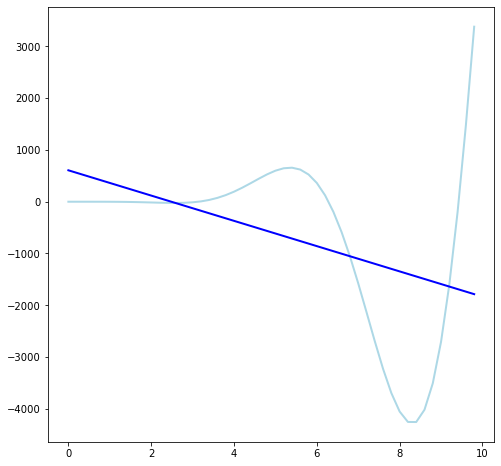

Score: 0.20093725424684472 for degree: 2
Coef: [[  0.         -33.49712087 -21.48946507]]
Intercept: [269.98318527]


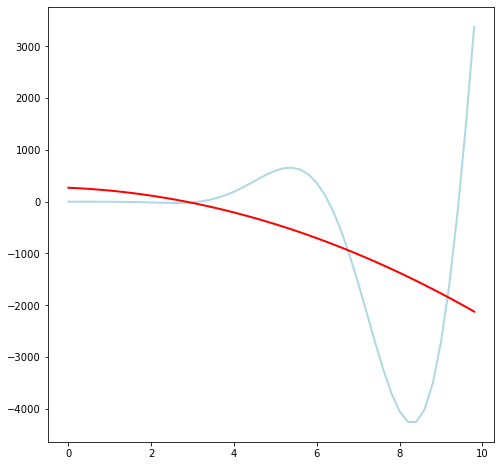

Score: 0.37439684910377136 for degree: 3
Coef: [[   0.         1998.28858102 -545.0721349    35.6178687 ]]
Intercept: [-1304.95348557]


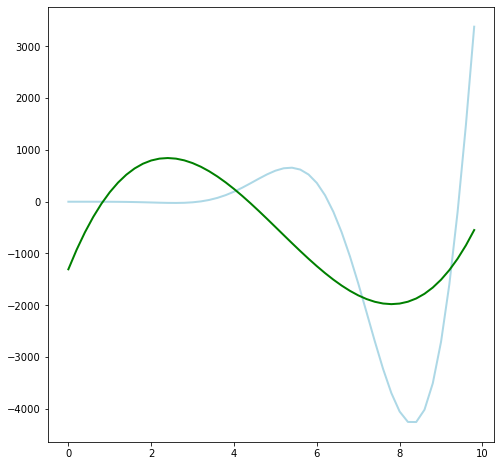

In [17]:
for degree in [1, 2, 3]:
    plot_poly_reg(x, y, degree)